In [5]:
import pandas as pd

# Load your dataset
data = pd.read_csv('global-data-on-sustainable-energy.csv')  # Replace with your actual dataset path


# Check for missing values
data.isnull().sum()

# Fill or drop missing values as necessary
data.fillna(method='ffill', inplace=True)  # Example of forward filling


C:\Users\aurav\AppData\Local\Temp\ipykernel_19300\1812281148.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Example of forward filling


In [4]:
data.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [6]:
# Define features and target
X = data[['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)']]  # Replace with actual feature names
y = data['Value_co2_emissions_kt_by_country']  # Replace with actual target variable

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [9]:
# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10465985129.405209
R^2 Score: 0.9632976522424439


In [10]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                        Coefficient
Electricity from fossil fuels (TWh)     2035.855428
Electricity from renewables (TWh)        505.302337
Low-carbon electricity (% electricity)   181.218485


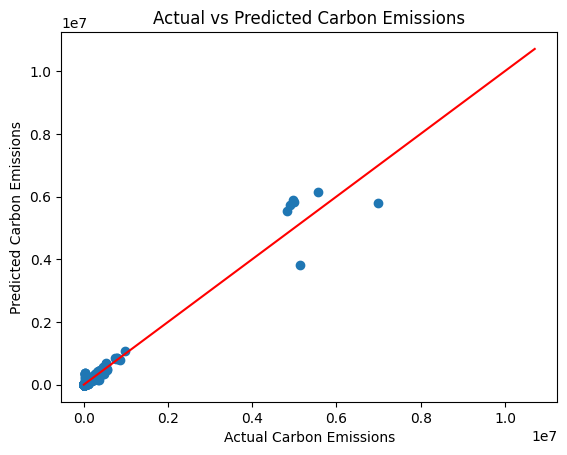

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Carbon Emissions')
plt.ylabel('Predicted Carbon Emissions')
plt.title('Actual vs Predicted Carbon Emissions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Diagonal line
plt.show()
